# SMS Spam Detection using Scikit-learn

## Objective
Build an SMS Spam Classifier using classical NLP techniques like preprocessing, feature extraction (TF-IDF), and classification.


In [1]:
# Step 1: Import Libraries


import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df1 = pd.read_csv("Data\\Raw\\spam.csv", encoding='latin-1')
df1

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
# Step 2: Load Dataset

df = pd.read_csv("Data\\Raw\\spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['message'][1]

'Ok lar... Joking wif u oni...'

## Step 3: Data Cleaning & Preprocessing

Before we can build a model, we need to clean and standardize our text data. In this step, we will:

- Convert all text to lowercase for consistency.
- Remove punctuation to simplify the text and reduce noise.

We are working with the `spam.csv` dataset from Kaggle, which contains text messages labeled as **spam** or **ham (not spam)**. Cleaning the text helps improve model accuracy by reducing the number of unique tokens the model has to learn from.

Let's define a function to clean each message and apply it to the dataset.


In [5]:
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

df['cleaned'] = df['message'].apply(clean_text)

## Step 4: Convert Text to Features (TF-IDF)

Machine learning models cannot work directly with raw text, so we need to convert our cleaned messages into numerical features. One effective way to do this is by using **TF-IDF (Term Frequency-Inverse Document Frequency)**.

TF-IDF transforms text into feature vectors that reflect the importance of words in the message relative to the entire dataset:
- **Term Frequency (TF):** how often a word appears in a message.
- **Inverse Document Frequency (IDF):** how unique or rare the word is across all messages.

We'll use Scikit-learn’s `TfidfVectorizer` to convert the cleaned text into a numerical matrix, and also map the target labels (`ham` and `spam`) to binary values: `0` for ham and `1` for spam.


# Understanding TF-IDF in NLP

**TF-IDF**, short for *Term Frequency-Inverse Document Frequency*, is a numerical statistic that reflects how important a word is to a document in a collection or corpus. It's a foundational technique in **Information Retrieval** and **Natural Language Processing (NLP)**.

---

## What is TF-IDF?

TF-IDF is the product of two metrics:

### 1. **Term Frequency (TF)**  
This measures how frequently a word appears in a specific document.

- **Formula:**  
  - Raw Count: `TF = Number of times term t appears in document d`  
  - Normalized: `TF = (Term count) / (Total terms in document)`

- **Example:**  
  If the word `apple` appears 5 times in a 100-word document:  
  - Raw TF = 5  
  - Normalized TF = 5 / 100 = 0.05

### 2. **Inverse Document Frequency (IDF)**  
This measures how rare or unique a word is across the entire document corpus.

- **Formula:**  
  `IDF = log(Total Documents / (Number of Documents Containing Term + 1))`

- **Example:**  
  If `apple` appears in 10 out of 1000 documents:  
  `IDF = log(1000 / 11) ≈ 1.96`

Common words like "the", "is", and "and" will have very low IDF values because they appear in nearly every document.

---

### TF-IDF Score
The final score is:

TF-IDF = TF * IDF


A **high TF-IDF score** indicates that a word:
- Appears frequently in a document (high TF)
- Is rare across all documents (high IDF)

This helps filter out uninformative words and highlight important ones.

---

## Why Does TF-IDF Exist?

Before TF-IDF, models like **Bag of Words (BoW)** treated all words equally. Common words would dominate the representation regardless of their actual meaning or relevance.

TF-IDF improves this by:
- **Discriminating** between common and informative words
- **Quantifying relevance** within a document
- **Enabling vectorization** for ML models to use structured data from text

---

## Why Do We Use TF-IDF?

TF-IDF is used widely for:

### Feature Extraction for ML
Transform raw text into numerical vectors for tasks like:
- Text classification (e.g., spam detection, sentiment analysis)
- Clustering documents by similarity

### Search & Information Retrieval
Search engines rank documents using TF-IDF scores to identify relevant pages for a given query.

### Keyword Extraction
Identify top keywords in a document for summarization or tagging.

### Document Similarity
Once vectorized, compute similarity using cosine distance between documents.

---

## How TF-IDF Works in Practice

### Step-by-Step:
1. **Preprocess text** – Lowercase, remove punctuation, etc.
2. **Tokenize** – Break sentences into individual words.
3. **Calculate TF** – Frequency of each word per document.
4. **Calculate IDF** – Rarity of each word across documents.
5. **Compute TF-IDF** – Multiply TF and IDF for each word.
6. **Vectorize** – Use matrix as input for machine learning models.

### In Python:
```python
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)  # corpus is a list of documents


In [6]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned'])
y = df['label'].map({'ham': 0, 'spam': 1})

In [7]:
#Step 5: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Step 6: Train Naive Bayes Model

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

##  Why Use Multinomial Naive Bayes for SMS Spam Detection?

In this project, we're using the **Multinomial Naive Bayes (MNB)** model because it's a highly effective and appropriate algorithm for text classification tasks, especially when working with features like word frequencies or TF-IDF scores.

---

### What Makes Multinomial Naive Bayes a Good Choice?

#### 1. **Designed for Text Data**
Multinomial Naive Bayes is built for discrete feature sets — like word counts or TF-IDF scores — which is exactly what we generate using `TfidfVectorizer`.

It assumes:
- The presence (or frequency) of each word in a document is independent of others, given the class.
- The text follows a "bag of words" model.

These assumptions fit our use case well.

---

#### 2. **Fast and Lightweight**
- Extremely quick to train and predict.
- Uses minimal system resources.
- Doesn’t require complex tuning or configuration to perform well.

This makes it perfect for tasks like **real-time spam detection**.

---

#### 3. **Performs Well on Sparse, High-Dimensional Data**
- Text data, once vectorized, results in thousands of features (unique words).
- Most documents (SMS messages) will only contain a small fraction of these words.
- This creates a **sparse matrix** — and Naive Bayes handles this efficiently and accurately.

---

### Why Not Use a More Complex Model?
Other models like **SVM**, **Logistic Regression**, or **Neural Networks** might also work, but:

| Model                | Pros                                         | Cons                             |
|---------------------|----------------------------------------------|----------------------------------|
| MultinomialNB        | Fast, simple, no tuning, interpretable       | Assumes word independence        |
| SVM                 | High accuracy                                 | Slower, needs tuning             |
| Logistic Regression | Good baseline, interpretable                 | May underperform without tuning  |
| Neural Networks     | Powerful, handles complex patterns           | Overkill for small datasets      |

For our task, Naive Bayes strikes the right balance of **simplicity, speed, and accuracy**.

---

### Summary
We use **Multinomial Naive Bayes** because it:
- Is specifically designed for **text-based classification**
- Works naturally with **TF-IDF features**
- Offers **fast, scalable performance**
- Is a **proven approach** for spam filters (like in early email systems)

It’s a great choice for our SMS spam detection project!


In [9]:
# step 7Evaluate Model

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[965   0]
 [ 36 114]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy: 0.967713004484305


## Step 8: Making Predictions with the Trained Model

Now that we’ve trained our `Multinomial Naive Bayes` model on the SMS spam dataset, it’s time to test it with new, unseen messages.

We’ll define a function called `predict_message` that:
1. Cleans the input message (removing punctuation and converting to lowercase),
2. Transforms it using the same `TF-IDF vectorizer` we used during training,
3. Uses the trained model to predict whether the message is **Spam** or **Not Spam**.

Let’s try it on an example message to see how it performs.


In [10]:

def predict_message(msg):
    msg = clean_text(msg)
    vec = vectorizer.transform([msg])
    return "Spam" if model.predict(vec)[0] == 1 else "Not Spam"

# Try it!
predict_message("Congratulations! You have won a $1000 Walmart gift card")


'Spam'

## Visualize Top Words in Spam and Ham Messages

To gain further insight into the characteristics of spam versus ham messages, we’ll create **word clouds** for each category. A word cloud is a visual representation of the most frequent words in text — the larger the word, the more frequently it appears.

We’ll:
- Combine all cleaned spam messages into one text,
- Do the same for ham messages,
- Generate and compare word clouds side by side.

This helps us intuitively see which words are more associated with spam (e.g., “free”, “winner”, “claim”) and which are common in ham messages.


In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [12]:
# Combine all cleaned messages into one large string for each category
spam_words = ' '.join(df[df['label'] == 'spam']['cleaned'])
ham_words = ' '.join(df[df['label'] == 'ham']['cleaned'])


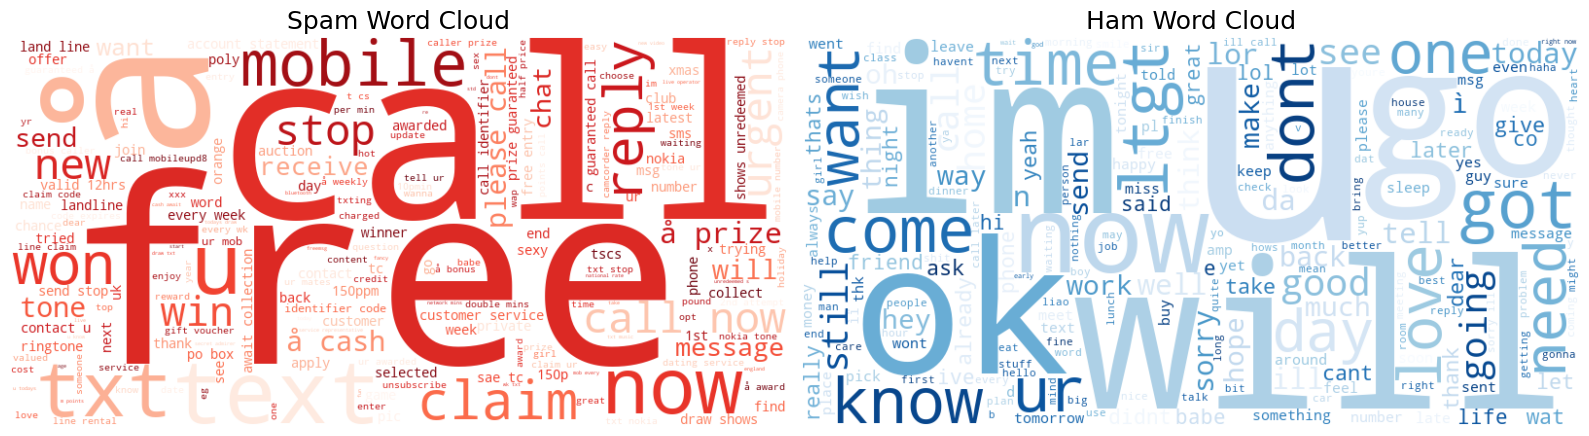

In [13]:
# Create word clouds
spam_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(spam_words)
ham_wc = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(ham_words)

# Plot them side by side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title("Spam Word Cloud", fontsize=18)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title("Ham Word Cloud", fontsize=18)
plt.axis('off')

plt.tight_layout()
plt.show()

## Build a Streamlit App for Real-Time SMS Spam Detection

To make our model interactive and user-friendly, we'll build a simple **Streamlit web application**. This app will:

- Let users type or paste any SMS message.
- Clean and transform the input using our trained `TF-IDF vectorizer`.
- Use the trained **Multinomial Naive Bayes model** to predict if the message is **Spam** or **Not Spam**.
- Display the result instantly in a user-friendly interface.

This makes it easy for non-technical users to test the model in real-time and understand how it works without writing any code.

Before running the app, we need to:
1. Save the trained model and vectorizer using `joblib`.
2. Write a Python file (`app.py`) that defines the Streamlit interface and prediction logic.
3. Run the app using the `streamlit run` command.


In [14]:
import joblib

# Save model and vectorizer
joblib.dump(model, 'Data\\ProcessedData\\spam_model.pkl')
joblib.dump(vectorizer, 'Data\\ProcessedData\\tfidf_vectorizer.pkl')

['Data\\ProcessedData\\tfidf_vectorizer.pkl']

In [ ]:
!streamlit run app.py & npx wait-on http://localhost:8501 && python -m webbrowser http://localhost:8501